<a href="https://colab.research.google.com/github/AMCCastillo/AI_IB/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**

N1__2063509__Alessandra Morales Vázquez

N1__2055762__Alondra María Cruz Castillo

N1__2043031__Miranda Ortega Salinas

N1__1858323__Venancio Hernández Santiago

N1__1912265__Stephanie Fernanda Vera Treviño

**1. Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import os

**2. Preprocessing**

In [ ]:
# Descompressing ZIP
import zipfile

with zipfile.ZipFile('Imagenes Brain MRI .zip', 'r') as zip_ref:
    zip_ref.extractall('/content/brain_tumor_dataset')

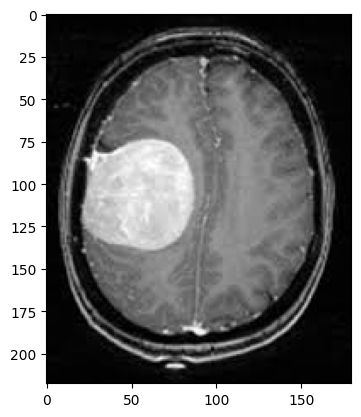

In [ ]:
# Load images
file = '/content/brain_tumor_dataset/yes/Y1.jpg'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )

# Image preview
plt.imshow(test_image, cmap='gray')

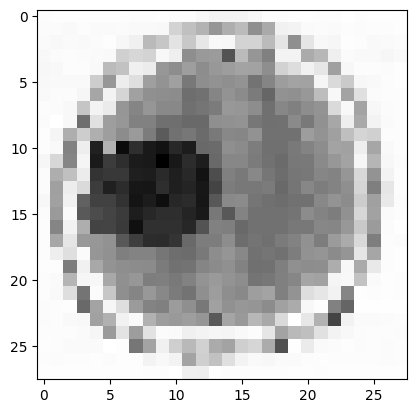

In [ ]:
# Image edition
img_resized = cv2.resize(test_image, (28,28), )
img_resized = cv2.bitwise_not(img_resized)

plt.imshow(img_resized, cmap='gray')
plt.savefig("abc.png")

In [ ]:
# Divide the dataset into 80% for training and 20% for validation, or 70% - 30%. You have to do a bit
from sklearn.model_selection import train_test_split

data = []
labels = []
categories = ['yes', 'no']
data_dir = '/content/brain_tumor_dataset'

for category in categories:
    path = os.path.join(data_dir, category)
    label = 1 if category == 'yes' else 0
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (28,28))
            data.append(img)
            labels.append(label)

import numpy as np
data = np.array(data)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

In [ ]:
# Preprocessing: visualization of variables and image normalization.
train_images.shape

(202, 28, 28)

In [ ]:
len(train_labels)

202

In [ ]:
train_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1])

In [ ]:
test_images.shape

(51, 28, 28)

In [ ]:
len(test_labels)

51

In [ ]:
# Normalization of pixel values.
train_images = train_images / 255.0
test_images = test_images / 255.0

**3. Structure and Training Convolutional Artificial Neural Network (CNN)**

In [18]:
# CNN MODEL
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

#Learning
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,802 (362.51 KB)

 Trainable params: 92,802 (362.51 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Training
history = model.fit(
    train_images, train_labels, epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6630 - loss: 0.6651 - val_accuracy: 0.5294 - val_loss: 0.6749
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6564 - loss: 0.6277 - val_accuracy: 0.5294 - val_loss: 0.6592
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6819 - loss: 0.6125 - val_accuracy: 0.5294 - val_loss: 0.6473
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6472 - loss: 0.6361 - val_accuracy: 0.7059 - val_loss: 0.6148
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6845 - loss: 0.6004 - val_accuracy: 0.5686 - val_loss: 0.6065
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7228 - loss: 0.5500 - val_accuracy: 0.7255 - val_loss: 0.5144
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7593 - loss: 0.5241 - val_accuracy: 0.8235 - val_loss: 0.4667
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7559 - loss: 0.5376 - val_accuracy: 0.8235 - val_loss: 0.4500


**4. CNN Accuracy Results**

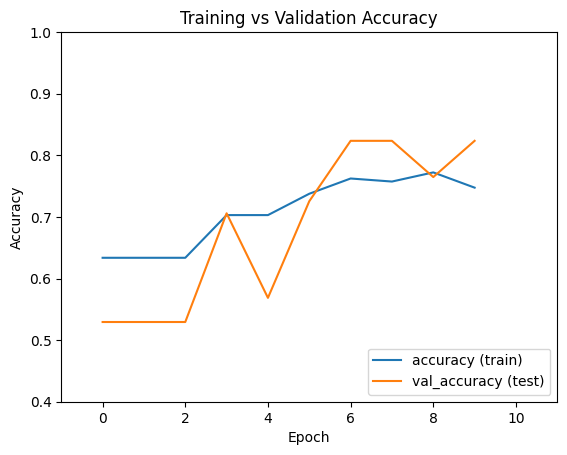

2/2 - 0s - 43ms/step - accuracy: 0.8235 - loss: 0.4654

Accuracy in test assembly: 0.8235294222831726


In [34]:
# Graph the difference between training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy (train)')
plt.plot(history.history['val_accuracy'], label='val_accuracy (test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, len(history.history['accuracy'])+1])
plt.legend(loc='lower right')
plt.title("Training vs Validation Accuracy")
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nAccuracy in test assembly:", test_acc)


**5. Predictions with the trained CNN**

In [23]:
predictions = model.predict(test_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [27]:
#Interpretation
text_class = {0: "NO", 1: "YES"}

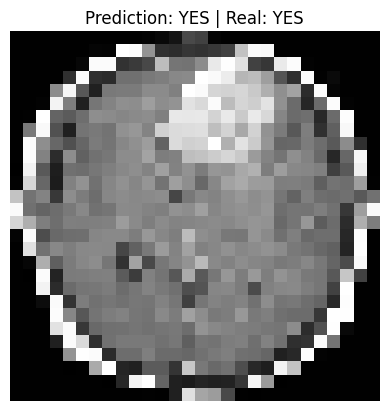

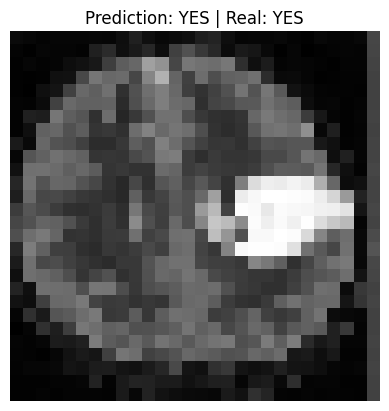

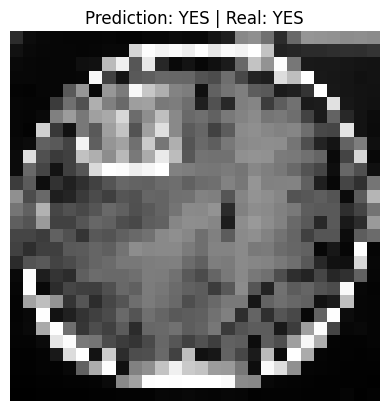

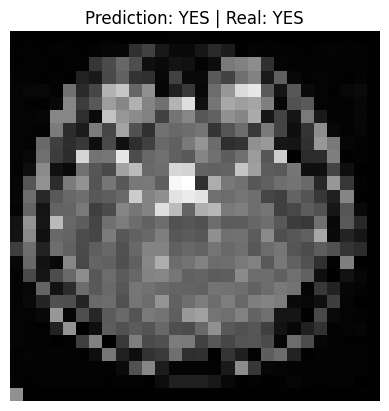

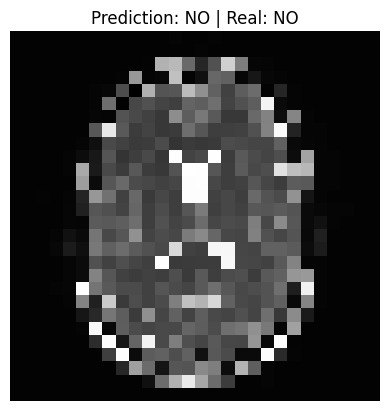

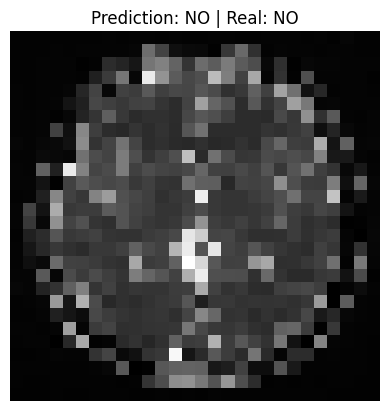

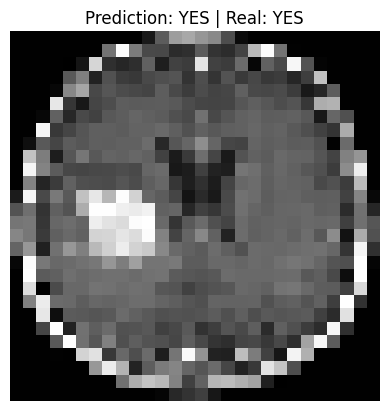

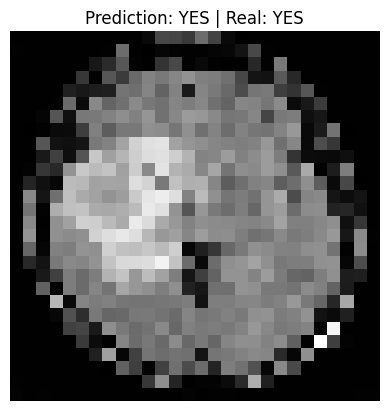

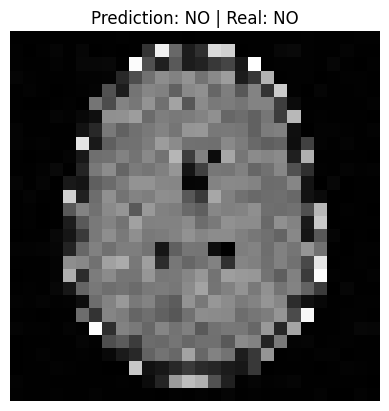

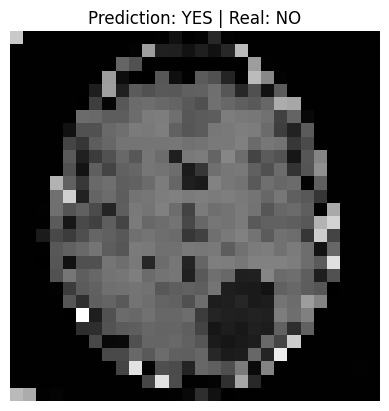

In [35]:
#Predictions of 10 images
for i in [1, 8, 15, 22, 27, 30, 36, 45, 48, 50]:
  x = predictions[i]
  y = test_labels[i]
  predicted_class = np.argmax(x)

  plt.imshow(test_images[i], cmap='gray')
  plt.title(f"Prediction: {text_class[predicted_class]} | Real: {text_class[y]}")
  plt.axis('off')
  plt.show()
